In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline, make_pipeline

def run_OLS_boot(comp_features = 12, boot_model = None):
    
    xaxis = range(1, comp_features + 1)
    
    mse_list, bias_list, var_list = {}, {}, {}
    ols_model = LinearRegression(fit_intercept = False)
    
    for deg in xaxis:
        model = make_pipeline(PolynomialFeatures(degree = deg), ols_model)

        t_tilde, t_pred = boot_model.simulate(model)
        mse, bias, var  = boot_model.decompose(t_pred)

        mse_list[deg]  = mse
        bias_list[deg] = bias
        var_list[deg]  = var

    plt.style.use("seaborn-darkgrid")
    plt.title('Bias-variance tradeoff for OLS')
    plt.xlabel('Polynomial Degree'); plt.ylabel('Error/Bias/Variance')
    plt.plot(xaxis, mse_list.values(),   c = 'blue'  , label='Mse')
    plt.plot(xaxis, bias_list.values(),  c = 'orange', label='Bias')
    plt.plot(xaxis, var_list.values(),   c = 'green' , label='Variance')
    plt.legend(loc='best')
    plt.savefig('OLS_ff15.png')
    
    return mse_list, bias_list, var_list

random:  False steps:  20 steplength:  0.05


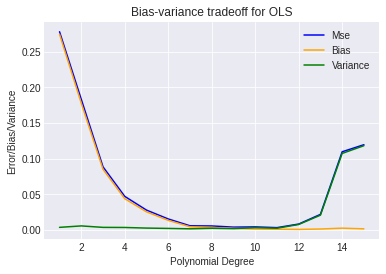

In [3]:
import frankefunction as fr
from bootstrap import *

z = fr.Franke(0, 0.2)
z_noisy, xx, yy = z.franke_function(random = False, precision = 0.05, noise = False) 


boot = Bootstrap(xx, yy, z_noisy, seed = None, scale_target=True)

mse_linreg, bias_linreg, var_linreg = run_OLS_boot(comp_features = 15 , boot_model = boot)

In [4]:
def run_biased_linreg_boot(comp_features = 12, boot_model = None, penalty = "Ridge", alpha = 0.01):
    
    xaxis = range(1, comp_features + 1)
    
    mse_list, bias_list, var_list = {}, {}, {}
    
    if penalty in ["Ridge", "ridge"]:
        peanalty = "Ridge"
        biased_model = Ridge(fit_intercept = False, alpha = alpha)
    elif penalty in ["LASSO", "Lasso", "lasso"]:
        penalty = "LASSO"
        biased_model = Lasso(fit_intercept = False, alpha = alpha)
        
    for deg in xaxis:
        model = make_pipeline(PolynomialFeatures(degree = deg), biased_model)

        t_tilde, t_pred = boot_model.simulate(model)
        mse, bias, var  = boot_model.decompose(t_pred)

        mse_list[deg]  = mse
        bias_list[deg] = bias
        var_list[deg]  = var

    plt.style.use("seaborn-darkgrid")
    plt.title(f'Bias-variance tradeoff for {penalty}')
    plt.xlabel('Polynomial Degree'); plt.ylabel('Error/Bias/Variance')
    plt.plot(xaxis, mse_list.values(),  c = 'blue', label = 'Mse')
    plt.plot(xaxis, bias_list.values(), c = 'orange', label = 'Bias')
    plt.plot(xaxis, var_list.values(),  c = 'green', label = 'Variance')
    plt.legend(loc='best')
    plt.savefig(f'{penalty}_{comp_features}_a01.png')

    return mse_list, bias_list, var_list

random:  False steps:  20 steplength:  0.05
(20, 20) (20, 20)


/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06501775167374291, tolerance: 0.0297707705722386
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0650233053906959, tolerance: 0.030386091043647628
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030441664260472123, tolerance: 0.02969460530884335
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27693575926676317, tolerance: 0.03485840593521925
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7189049773837795, tolerance: 0.027871960451215438
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09680419665610884, tolerance: 0.034353952054912075
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linea

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2889578782755109, tolerance: 0.03453247601011058
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.14739749369610422, tolerance: 0.030531765182921937
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07437266941667531, tolerance: 0.034221909355381594
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linea

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0701544013625437, tolerance: 0.028340876261450036
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3803895308906533, tolerance: 0.032412872113184
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.35352027308151435, tolerance: 0.03296945634378284
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_mo

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12346019905785965, tolerance: 0.02955798431799892
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2133921549442448, tolerance: 0.03282124543077604
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1126230573097473, tolerance: 0.03614709228816653
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_m

/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9178584945288932, tolerance: 0.025320903442857975
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16950255189330932, tolerance: 0.027651864747121245
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3947511755809785, tolerance: 0.03122797312292465
  model = cd_fast.enet_coordinate_descent(
/srv/conda/envs/notebook/lib/python3.9/site-packages/sklearn/linear

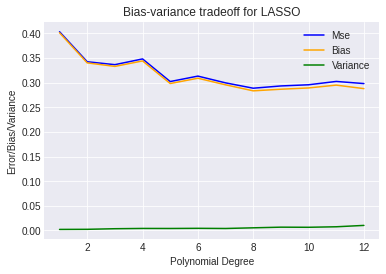

In [5]:
z = fr.Franke(0, 0.2)
z_noisy, xx, yy = z.franke_function(random = False, precision = 0.05, noise = False) 
print(xx.shape, yy.shape)

boot = Bootstrap(xx, yy, z_noisy, seed = None, scale_target=True)

#mse_linreg, bias_linreg, var_linreg = run_biased_linreg_boot(comp_features = 15 , boot_model = boot, alpha = 0.001)
mse_linreg, bias_linreg, var_linreg = run_biased_linreg_boot(comp_features = 12 , penalty = "LASSO", boot_model = boot, alpha = 0.1)